In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [23]:
X, Y = datasets.make_classification(n_samples=500, n_features=2, n_redundant=0)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [25]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # calculate mean, var, and prior for each class
        self.mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self.var = np.zeros((n_classes, n_features), dtype=np.float64)
        self.priors =  np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self.classes):
            X_c = X[y==c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self.predict_one(x) for x in X]
        return np.array(y_pred)

    def predict_one(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            posterior = np.sum(np.log(self.pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
            

    def pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x-mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [26]:
def accuracy(y_true, y_pred):
    acc = np.sum(y_true == y_pred) / len(y_true)
    return acc

In [27]:
nb = NaiveBayes()
nb.fit(x_train, y_train)

predictions = nb.predict(x_test)
print("Accuracy", accuracy(y_test, predictions))

Accuracy 0.75


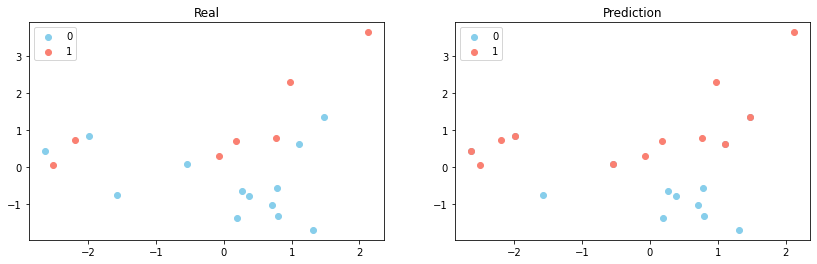

In [40]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
plt.title('Real')
plt.scatter(x_test[y_test == 0][:, 0], x_test[y_test == 0][:, 1], color='skyblue', label='0')
plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1], color='salmon', label='1')
plt.legend()


plt.subplot(122)
plt.title('Prediction')
plt.scatter(x_test[y_test == 0][:, 0], x_test[y_test == 0][:, 1], color='skyblue', label='0')
plt.scatter(x_test[predictions == 1][:, 0], x_test[predictions == 1][:, 1], color='salmon', label='1')
plt.legend()

plt.show()